In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from demo_estimation_functions import loading_data, projections, graph_manipulation as gm, data_visualization as dv
from sklearn.metrics import confusion_matrix, accuracy_score

# Demography Estimation Homework - Balint Pardanyi, Gergo Tovari

The dataset collects the Pokec profiles. Pokec is a slovakian on-line social network, which connects 1.6 million people. With this amount, Pokec is the most populer social network in Slovakia. The dataset has many variables like gender, age etc.

## Reading, forming and manipulating the dataset

#### Loading the original and the test data

In [3]:
#loading all the selected profiles:
selected_profiles, edges = loading_data.load_and_select_profiles_and_edges()
#loading the dataset with 40K observations as the gender variable was replaced by n.as:
test_selected_profiles, test_edges= loading_data.test_load_and_select_profiles_and_edges()

loading profiles
loading edges
1    2642113
2    1992414
Name: source, dtype: int64
Selected profiles: 695406
Nodes with edges: 434590
loading profiles
loading edges
1    2642113
2    1992414
Name: source, dtype: int64
Selected profiles: 695406
Nodes with edges: 434590


The data contains 6965406 profiles and between 434590 people there's a connection. These profiles are between the age of 15 and 50, their gender is either male or female, and their profil is public.

For the estimations of the 'gender veriable', one need a test dataset where 40K observations' gender variable has been cut out, this is the "test dataset".

In [4]:
selected_profiles.head(15)

,user_id,public,gender,AGE
0,1,1,1.0,26.0
4,4,1,0.0,26.0
5,17,1,0.0,27.0
6,5,1,1.0,26.0
7,18,1,1.0,18.0
8,31,1,1.0,24.0
9,19,1,1.0,21.0
11,32,1,1.0,21.0
13,7,1,0.0,22.0
19,10,1,0.0,22.0


In [5]:
#new variable was created as the observation is either in the "train" or the "test" data:
test_selected_profiles.head(15)

,user_id,public,gender,AGE,TRAIN_TEST
0,1,1,1.0,26.0,TRAIN
4,4,1,0.0,26.0,TRAIN
5,17,1,0.0,27.0,TRAIN
6,5,1,1.0,26.0,TRAIN
7,18,1,1.0,18.0,TRAIN
8,31,1,1.0,24.0,TRAIN
9,19,1,1.0,21.0,TRAIN
11,32,1,1.0,21.0,TRAIN
13,7,1,0.0,22.0,TRAIN
19,10,1,0.0,22.0,TRAIN


#### Creating graph

In [6]:
#creating a graph with the nodes ans edges for the easier calculations:
G=gm.create_graph_from_nodes_and_edges(test_selected_profiles, test_edges)

## Predictions - from neighbors

In this section, we try to estimate the "test" data's missing gender observations based on the "train" dataset. For every observations, we calculate the number of male and female connections, and if the given person has more male friends, the projection is 'male', if more female friends, the projection is 'female'. In case of equality, we guess 'male' as there's more male observations in the given data.

In [7]:
#creating the dest dataframe with the empty gender values:
test_df=test_selected_profiles[test_selected_profiles["TRAIN_TEST"]=="TEST"]

In [8]:
#creating the dataframe with the predicted values with the function described above:
prediction_df=projections.prediction_from_neighbors(G, test_selected_profiles, test_df)

In [9]:
prediction_df

,user_id,gender
65,80,1
116,140,0
178,229,0
185,272,0
200,259,1
...,...,...
1632268,1632269,1
1632570,1632571,0
1632634,1632635,1
1632778,1632779,0


In [10]:
# creating the original dataset containing all the users (based on their id-s) from the "train" dataset, and their original
# gender. It is needed for the Confusion matrix to be able to measure the prediction's accuracy score:
original_df=selected_profiles[selected_profiles.user_id.isin(prediction_df.user_id)].gender

In [11]:
#creating the Confusion matrix and calculating the prediction's accuracy score:
y_test= original_df
y_pred = prediction_df.gender
conf_matrix = confusion_matrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)

print(f"Confusion matrix:\n{conf_matrix}\n\nThe prediction's accuracy score is {acc_score}")

Confusion matrix:
[[ 8833 10043]
 [ 9842 11282]]

The prediction's accuracy score is 0.502875


Almost half of the predictions were wrong, so the basic assumptation that people are connected with their same gender (obviosuly) has not coped.

# Plots - visualization of the calculated data

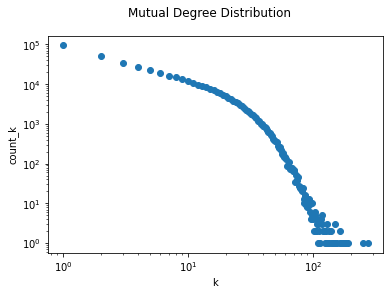

In [12]:
dv.plot_degree_distribution(G)

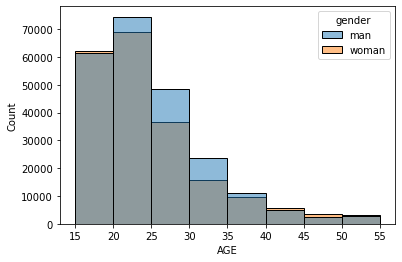

In [13]:
dv.plot_age_distribution_by_gender(selected_profiles)

If we have a look ath the distribution of the profiles based on gender and age, one can see most of the observations contain profiles in their 20's, and more male especially in the 25-30 age range.

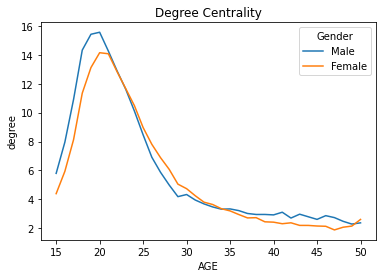

In [14]:
dv.plot_degree_by_gender(selected_profiles, G)

In case of degree centrality, such as how many connecions one observation has, we can is a declining trend as we move from the age of 20', meaning people have less strong connections as it's expected. The peak is 15 connection in average among males and 14 among females at the age of 20. 

It' interesting to see how fastly the curve declines, which means people tend to lose most of their strong connections quickly. For the first time it can be also strange to see while the curve rises a bit after the age of 45, especially among females, but if we consider mothers with their children of the age of 15-20, starting to use social media sites, this trend might seem logical as well.

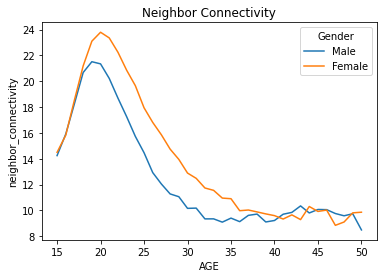

In [15]:
dv.plot_neighbor_by_gender(selected_profiles, G)

In case of neighbor connectivity, the key take-aways are the same as in case of degree centrality, one extra finding could be that female users tend to have higher connectivity rates as males, througout the whole age period.

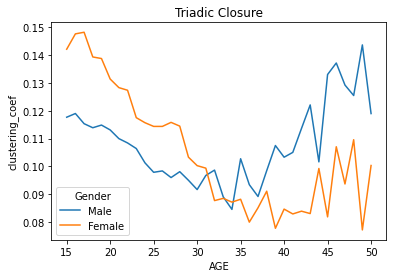

In [16]:
dv.plot_clustering_by_gender(selected_profiles, G)

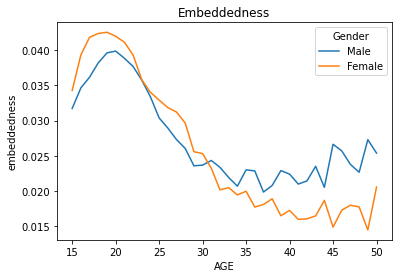

In [17]:
dv.plot_embeddedness_by_gender(selected_profiles, G)

As the clustering coefficients and the embeddedness values show, males tend to have weaker social circles and with their aging the friendship circles become stronger, while females tend to have the exact opposite trend througout their life.